# Data Preprocessing

In [1]:
# importing Libraaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

# 1 eur = $1.08377483
EUR = 1.08
# 1 rupee = $0.01364522
RUPEE = 0.014
# 1 pound = $0.8499
POUND = 0.85
# 1 Indonesian Rupee = $0.000070
INDONESIAN_RUPEE = 0.000070

def trim_values(x):

    if isinstance(x, str) and len(x.strip()) == 0:
        return np.nan
    else:
        if isinstance(x, str):
            return x.strip() 
        else:
            return x
        
def remove_non_words(val, symb):
    val =  re.sub(r'[^\x00-\x7f]',r'',val)
    val = val.replace('C',"")
    val = val.replace('�','')
    val = val.replace('_','')
    return val.replace(symb, '')
        
def make_price_numeric(price): # Convert price in all currencies to $
    #print(price)
    if 'nan' == (str(price)):
        return price

    if price.startswith('â'):
        price = remove_non_words(price, '')
        return float(price)*RUPEE
        
    if price.startswith( 'About' ):
        price_str = price.split(' ')
        if price_str[2] == 'USD':
            return float(price_str[1])
        elif price_str[2] == 'EUR':
            return float(price_str[1])*EUR
        else:
            #Just return original val for now
            return float(price_str[1])
        
    elif '/' in price:
        price_str = price.split(' / ')
        #$ 420.00 / £ 344.95 / € 368.00 / ₹ 30,780

        for currency in price_str:
            currency = currency.replace(',', '')
            if '$' in currency:
                
                currency = remove_non_words(currency, '$')
                return float(currency)
            if '£' in currency:
                
                currency = remove_non_words(currency, '£')
                return float(currency)*POUND
            if '€' in currency:
                
                currency = remove_non_words(currency, '€')
                return float(currency)*EUR
            if '₹' in currency:
                
                currency = remove_non_words(currency, '₹')
                return float(currency)*RUPEE
            
            if 'Rp' in currency:
                
                currency = remove_non_words(currency, 'Rp')
                return float(currency)*INDONESIAN_RUPEE
    else:
            price = price.replace(',', '')
            if '$' in price:
                price = remove_non_words(price, '$')
                return float(price)
            if '£' in price:
                price = remove_non_words(price, '£')
                return float(price)*POUND
            if '€' in price:
                price = remove_non_words(price, '€')
                return float(price)*EUR
            if '₹' in price:
                price = remove_non_words(price, '₹')
                return float(price)*RUPEE
            if 'Rp' in price:
                price = remove_non_words(price, 'Rp')
                return float(price)*INDONESIAN_RUPEE
        
    #price = price.replace("��_���", "")              
    #price =   re.sub('r\D',r'',price) 
    try:
        return float(price)
    except:
        return float(remove_non_words(price, ''))*RUPEE
        

def make_gps_binary(gps):   # Converts GPS to YES or NO
    #print(gps)
    if 'nan' == (str(gps)):
        return 'No'
    elif gps.startswith('Yes'):
        return "Yes"
    else:
        return "No"

    
    
def make_jack_binary(jack): # Converts jack to YES OR NO
    
    if 'nan' == (str(jack)):
        return 'No'
    elif jack.startswith('Yes'):
        return "Yes"
    else:
        return "No"
    

def make_nfc_binary(nfc):  # Converts NFC to Yes or No
    
    if 'nan' == (str(nfc)):
        return 'No'
    elif nfc.startswith('Yes'):
        return "Yes"
    else:
        return "No" 
    
def make_radio_binary(radio): # Converts Radio Column to Yes or NO
    #print(radio)
    if 'nan' == (str(radio)):
        return 'No'
    elif 'FM' in radio:
        return "Yes"
    else:
        return "No" 
# The code below reduces the number of categorical features for every column    
def make_charging_binary(charging): 
    
    if 'nan' == (str(charging)):
        return 'Normal'
    elif  'Fast' in charging:
        return "Fast Charging"
    elif 'Quick' in charging:
        return "Fast Charging"
    elif 'Wireless' in charging:
        return "Wireless Charging"
    else:
        return "Normal"
    
def make_sim_binary(sim):
    
    if 'nan' == (str(sim)):
        return 'Single SIM'
    elif  'Dual' in sim:
        return "Dual SIM"
    elif 'Single' in sim:
        return "Single SIM"
    elif 'Triple' in sim:
        return "Triple SIM"
    elif 'eSIM' in sim:
        return "eSIM"
    else:
        return "OTHER"
def make_usb_binary(usb):
    if 'nan'==(str(usb)):
        return 'USB Type-C'
    elif 'Lightning' in usb:
        return 'Lightning'
    elif 'USB Type-C'in usb:
        return 'USB Type-C'
    elif 'microUSB 2.0' in usb:
        return 'microUSB 2.0'
    elif 'Proprietary' in usb:
        return 'Proprietary'
    elif '2.0' in usb:
        return '2.0'
    else:
        return "OTHER"
def make_resolution_binary(resolution):
        try:
            return resolution[:resolution.index(",")]
        except:
            return ' '
def make_size_binary(size):
        try:
            return size[:size.index(",")]
        except:
            return "OTHER"
def make_os_binary(os):
    try:
        if 'Android' in os[:os.index(",")]:
            return "Android"
        elif 'Windows' in os[:os.index(",")]:
            return "Windows"
        elif 'iOS'in os[:os.index(",")]:
            return "IOS"
        elif 'iPadOS'in os[:os.index(",")]:
            return "IPadOS"
        elif 'watchOS' in os[:os.index(",")]:
            return 'watchOS'
    except:
        return "OTHER"
def make_chip_set_binary(chipset):
    if 'nan'==(str(chipset)):
        return "OTHER" 
    elif 'Apple' in chipset:
        try:
            return chipset[:chipset.index(",")]
        except:
            return "OTHER"
    
    elif 'Google' in chipset:
        try:
            return chipset[:chipset.index(",")]
        except:
            return "OTHER"
    elif 'Qualcomm' in chipset:
        return 'Qualcomm'
    elif 'Mediatek' in chipset:
        return 'Mediatek'
    elif 'Spreadtrum' in chipset:
        return 'Spreadtrum'
    elif 'Intel Atom' in chipset:
        return 'Intel Atom'
    elif 'Unisoc' in chipset:
        return 'Unisoc'
    elif 'Exynos' in chipset:
        return 'Exynos'
    elif 'Broadcom' in chipset:
        return 'Broadcom'
    elif 'Pega-Dual'in chipset:
        return 'Pega-Dual'
def make_cpu_binary(cpu):
    if 'nan'==(str(cpu)):
        return "OTHER"
    elif 'Hexa-core' in cpu:
        return'Hexa-core'
    elif 'Dual-core' in cpu:
        return 'Dual-core'
    elif 'Quad-core' in cpu:
        return  'Quad-core'
    elif 'Octa-core' in cpu:
        return 'Octa-core'
    elif 'Triple-core'in cpu:
        return 'Triple-core'
    elif '1.0 GHz Cortex-A8' in cpu:
        return '1.0 GHz Cortex-A8'
    elif 'Deca-core' in cpu:
        return 'Deca-core'
    else:
        return "OTHER"
def make_gpu_binary(gpu):
    if 'nan'==(str(gpu)):
        return "OTHER"
    elif 'Apple GPU' in gpu:
        return 'Apple GPU'
    elif 'PowerVR' in gpu:
        return 'PowerVR'
    elif 'Mali' in gpu:
        return 'Mali'
    elif 'Adreno'in gpu:
        return 'Adreno'
    elif 'ARM' in gpu:
        return 'ARM'
    elif 'Nvidia Maxwell' in gpu:
        return 'Nvidia Maxwell'
    elif 'Vivante' in gpu:
        return 'Vivante'
    elif 'Broadcom VideoCore'in gpu:
        return "OTHER"
    
def make_card_slot_binary(cardslot):
    if 'nan'==(str(cardslot)):
        return "OTHER"
    elif 'microSDXC'in cardslot:
        return 'microSDXC'
    elif 'microSDHC' in cardslot:
        return 'microSDHC'
    else:
        return "OTHER"
def make_internal_binary(internal):
    try:
        return internal[:internal.index(",")]
    except:
        return " "
def make_bluetooth_binary(bluetooth):
    try:
        return bluetooth[:bluetooth.index(",")]
    except:
        return "OTHER"
def wlan(wlan):
    try:
        if 'No' in wlan or "no" in wlan:
            return "NO"
        else:
            return "Yes"
    except:
        return "OTHER"
def sensor(sensor):
    if 'nan'==(str(sensor)):
        return "OTHER"
    elif 'Face ID' in sensor:
        return 'Face ID'
    elif 'Fingerprint' in sensor:
        return 'Fingerprint'
    elif 'Accelerometer'in sensor:
        return 'Accelerometer'
    elif 'Infrared Face ID' in sensor:
        return 'Infrared Face ID'
    else:
        return "OTHER"
def announced(a):
    try:
        return a[:a.index(",")]
    except:
        return "OTHER"
def weight(a):
    try:
        return float(((a[:a.index("g")]).replace("g","")).strip())
    except:
        pass
def status(a):   # if the phone is available or discontinued
    try:
        #return a[:a.index(".")]
        return ((a[:a.index(".")]).replace(".","")).strip()
    except:
        return "OTHER"
def Released_year(a): # Year when the phone was released
    try:
        #return a[:a.index(".")]
        return ((a[a.index("."):a.index(',')]).replace(". Released","")).strip()
    except:
        return "OTHER"
def size(a):
    try:
        return float((a.replace("inches","")).strip())
    except:
        pass
def space(a):
    try:
        return (a[:a.index("B")].replace("G","")).strip() + "GB"
    except:
        return "OTHER"
def RAM(a):
    try:
        return (a[a.index(" "):].replace('RAM',"")).strip()
    except:
        return "OTHER"


def horizontal_pixel(a):
    
    try:
       
        if 'X' in a or "x" in a:    # X can be big or small
            return ((a[a.index("x"):a.index("p")]).replace("x","")).strip()
        
       
    except:
        return "nan"   
def vertical_pixel(a):
    
    try:
        
        if 'X' in a or "x" in a:    # X can be big or small
            return ((a[:a.index("x")]).replace("x","")).strip()
        
       
    except:
        return "nan"
    
def price(price):
    return float(price)
def price_category(p):
    try:
        if p<=270:
            return "Low"
        elif p>=270:
            return "High"
    except:
        pass


In [2]:
df=pd.read_csv(r"BIA_660_ML_dataset_Final.csv", encoding="latin")

pd.set_option('display.max_rows', df.shape[0]+1)

colum_names = df.head()

for column in colum_names:
    df[column] = df[column].apply(trim_values)
   

In [3]:
df.head()

,Brand,Product,Technology,Announced,Status,Dimension,Weight,SIM,USB,Size,...,Jack,Bluetooth,GPS,NFC,Radio,Charging,Wlan,Sensor,Price,Unnamed: 26
0,Apple,iPhone 13 Pro Max,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240 g (8.47 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","6.7 inches, 109.8 cm2 (~87.4% screen-to-body r...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (27W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...","$Ûä1,099.00 / å£Ûä1,049.00 / RpÛä23,681,736",NaN
1,Apple,iPhone 13 Pro,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240 g (8.47 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","6.7 inches, 109.8 cm2 (~87.4% screen-to-body r...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (27W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...","$Ûä1,099.00 / å£Ûä1,049.00 / RpÛä23,681,736",NaN
2,Apple,iPhone 13,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240 g (8.47 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","6.7 inches, 109.8 cm2 (~87.4% screen-to-body r...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (27W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...","$Ûä1,099.00 / å£Ûä1,049.00 / RpÛä23,681,736",NaN
3,Apple,iPhone 13 mini,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",131.5 x 64.2 x 7.7 mm (5.18 x 2.53 x 0.30 in),141 g (4.97 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","5.4 inches, 71.9 cm2 (~85.1% screen-to-body ra...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (18W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...",$Ûä699.99 / å£Ûä679.00 / âÂÛä799.00 / â_...,NaN
4,Apple,iPad mini (2021),GSM / HSPA / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",195.4 x 134.8 x 6.3 mm (7.69 x 5.31 x 0.25 in),293 g (Wi-Fi) / 297 g (Wi-Fi + Cellular) (10.3...,"Nano-SIM, eSIM","USB Type-C 3.1, DisplayPort","8.3 inches, 203.9 cm2 (~77.4% screen-to-body r...",...,No,"5.0, A2DP","Yes, with A-GPS, GLONASS (WiÛÔFi + Cellular m...",No,No,NaN,"Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Fingerprint (side-mounted), accelerometer, gyr...",NaN,NaN


# Calling defined functions

In [4]:
# cleaning Price column
del df['Unnamed: 26']
df['Price'] = df['Price'].apply(make_price_numeric)

# cleaning GPS column
df['GPS'] = df['GPS'].apply(make_gps_binary)
#print(df['GPS'])

#cleaning Jack column
df['Jack'] = df['Jack'].apply(make_jack_binary)
#print(df['Jack'])

#cleaning NFC column
df['NFC'] = df['NFC'].apply(make_nfc_binary)
#print(df['NFC'])

#cleaning Radio column
df['Radio'] = df['Radio'].apply(make_radio_binary)

#cleaning Charging column
df['Charging'] = df['Charging'].apply(make_charging_binary)

#cleaning SIM column
df['SIM'] = df['SIM'].apply(make_sim_binary)
df['USB']=df['USB'].apply(make_usb_binary)
df['Resolution']=df['Resolution'].apply(make_resolution_binary)
df['Size']=df['Size'].apply(make_size_binary)
df['OS']=df['OS'].apply(make_os_binary)
df['Chipset']=df['Chipset'].apply(make_chip_set_binary)
df['CPU']=df['CPU'].apply(make_cpu_binary)
df['GPU']=df['GPU'].apply(make_gpu_binary)
df['Card_slot']=df['Card_slot'].apply(make_card_slot_binary)
df['Internal']=df['Internal'].apply(make_internal_binary)
df['Bluetooth']=df['Bluetooth'].apply(make_bluetooth_binary)
df['Wlan']=df['Wlan'].apply(wlan)
df['Sensor']=df['Sensor'].apply(sensor)
df['Announced']=df['Announced'].apply(announced)
df['Weight']=df['Weight'].apply(weight)
df['Released_year']=df['Status'].apply(Released_year)
df['Status']=df['Status'].apply(status)
df['Size']=df['Size'].apply(size)
df['Internal_space']=df['Internal'].apply(space)
df['RAM']=df['Internal'].apply(RAM)

df['horizontal_pixel']=df['Resolution'].apply(horizontal_pixel)
df['vertical_pixel']=df['Resolution'].apply(vertical_pixel)
df.dropna(subset=['Price'],axis=0,inplace=True)  # Dropping nulls from price column
df.dropna(subset=['vertical_pixel'],axis=0,inplace=True)
df["price_category"]=df['Price'].apply(price_category)



In [5]:
df.apply(lambda col: len(col.unique())) # Get unique values for each feature

Brand                 8
Product             723
Technology           16
Announced            14
Status                3
Dimension           455
Weight              230
SIM                   4
USB                   6
Size                 79
Resolution           53
OS                    5
Chipset               9
CPU                   8
GPU                   8
Card_slot             3
Internal             32
Jack                  2
Bluetooth            12
GPS                   2
NFC                   2
Radio                 2
Charging              2
Wlan                  2
Sensor                4
Price               197
Released_year         9
Internal_space        9
RAM                  19
horizontal_pixel     41
vertical_pixel       31
price_category        2
dtype: int64

In [6]:
df.isnull().sum() # Check for nulls

Brand                0
Product              0
Technology           0
Announced            0
Status               0
Dimension            0
Weight              11
SIM                  0
USB                  0
Size                 0
Resolution           0
OS                   0
Chipset             68
CPU                  0
GPU                  7
Card_slot            0
Internal             0
Jack                 0
Bluetooth            0
GPS                  0
NFC                  0
Radio                0
Charging             0
Wlan                 0
Sensor               0
Price                0
Released_year        0
Internal_space       0
RAM                  0
horizontal_pixel     0
vertical_pixel       0
price_category       0
dtype: int64

In [7]:
df.shape # Shape of the data frame


(723, 32)

In [8]:
d=df.copy()
d.drop(['Internal',"Dimension","Resolution","Price"],axis=1,inplace=True) # Dropping unnecessary features

In [9]:
d.head()

,Brand,Product,Technology,Announced,Status,Weight,SIM,USB,Size,OS,...,Radio,Charging,Wlan,Sensor,Released_year,Internal_space,RAM,horizontal_pixel,vertical_pixel,price_category
0,Apple,iPhone 13 Pro Max,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,240.0,Dual SIM,Lightning,6.7,IOS,...,No,Fast Charging,Yes,Face ID,2021,128GB,6GB,2778,1284,High
1,Apple,iPhone 13 Pro,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,240.0,Dual SIM,Lightning,6.7,IOS,...,No,Fast Charging,Yes,Face ID,2021,128GB,6GB,2778,1284,High
2,Apple,iPhone 13,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,240.0,Dual SIM,Lightning,6.7,IOS,...,No,Fast Charging,Yes,Face ID,2021,128GB,6GB,2778,1284,High
3,Apple,iPhone 13 mini,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,141.0,Dual SIM,Lightning,5.4,IOS,...,No,Fast Charging,Yes,Face ID,2021,128GB,4GB,2340,1080,High
9,Apple,iPad Pro 12.9 (2021),GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,682.0,eSIM,USB Type-C,12.9,IPadOS,...,No,Fast Charging,Yes,Face ID,2021,128GB,8GB,2732,2048,High


In [10]:
temp_features=['Announced', 'Released_year'] # Temporal features

In [11]:
d.__dict__.update(d.astype({'Weight':'float','Size':'float'}).__dict__) # Convert continous features to float

In [12]:
cat_features=[feature for feature in d.columns if d[feature].dtype=='O' and feature ] # List of categorical features

In [13]:
cat_features

['Brand',
 'Product',
 'Technology',
 'Announced',
 'Status',
 'SIM',
 'USB',
 'OS',
 'Chipset',
 'CPU',
 'GPU',
 'Card_slot',
 'Jack',
 'Bluetooth',
 'GPS',
 'NFC',
 'Radio',
 'Charging',
 'Wlan',
 'Sensor',
 'Released_year',
 'Internal_space',
 'RAM',
 'horizontal_pixel',
 'vertical_pixel',
 'price_category']

In [14]:
num_feature=[feature for feature in d.columns if d[feature].dtype!='O' and feature not in cat_features and feature not in temp_features] # List of numerical features

In [15]:
num_feature

['Weight', 'Size']

In [16]:
d.info() # we can see there are few nulls in dtype object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 817
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             723 non-null    object 
 1   Product           723 non-null    object 
 2   Technology        723 non-null    object 
 3   Announced         723 non-null    object 
 4   Status            723 non-null    object 
 5   Weight            712 non-null    float64
 6   SIM               723 non-null    object 
 7   USB               723 non-null    object 
 8   Size              723 non-null    float64
 9   OS                723 non-null    object 
 10  Chipset           655 non-null    object 
 11  CPU               723 non-null    object 
 12  GPU               716 non-null    object 
 13  Card_slot         723 non-null    object 
 14  Jack              723 non-null    object 
 15  Bluetooth         723 non-null    object 
 16  GPS               723 non-null    object 
 1

In [17]:
features_with_nan=[feature for feature in d.columns if d[feature].isnull().sum()>1] # Checkimg % Of nulls
for feature in features_with_nan:
    print("Features with nan {} with {}% null values".format(feature,np.round(d[feature].isnull().mean()*100,2)))

Features with nan Weight with 1.52% null values
Features with nan Chipset with 9.41% null values
Features with nan GPU with 0.97% null values


In [18]:
# The nulls are very few we can directly drop them

In [19]:
d.isnull().sum()

Brand                0
Product              0
Technology           0
Announced            0
Status               0
Weight              11
SIM                  0
USB                  0
Size                 0
OS                   0
Chipset             68
CPU                  0
GPU                  7
Card_slot            0
Jack                 0
Bluetooth            0
GPS                  0
NFC                  0
Radio                0
Charging             0
Wlan                 0
Sensor               0
Released_year        0
Internal_space       0
RAM                  0
horizontal_pixel     0
vertical_pixel       0
price_category       0
dtype: int64

In [20]:
d.dropna(subset=['Weight','GPU','Chipset'],axis=0,inplace=True) # Dropping nulls

In [21]:
d.isnull().sum() # The data set is free of nan values

Brand               0
Product             0
Technology          0
Announced           0
Status              0
Weight              0
SIM                 0
USB                 0
Size                0
OS                  0
Chipset             0
CPU                 0
GPU                 0
Card_slot           0
Jack                0
Bluetooth           0
GPS                 0
NFC                 0
Radio               0
Charging            0
Wlan                0
Sensor              0
Released_year       0
Internal_space      0
RAM                 0
horizontal_pixel    0
vertical_pixel      0
price_category      0
dtype: int64

# Exploratory Data Analysis

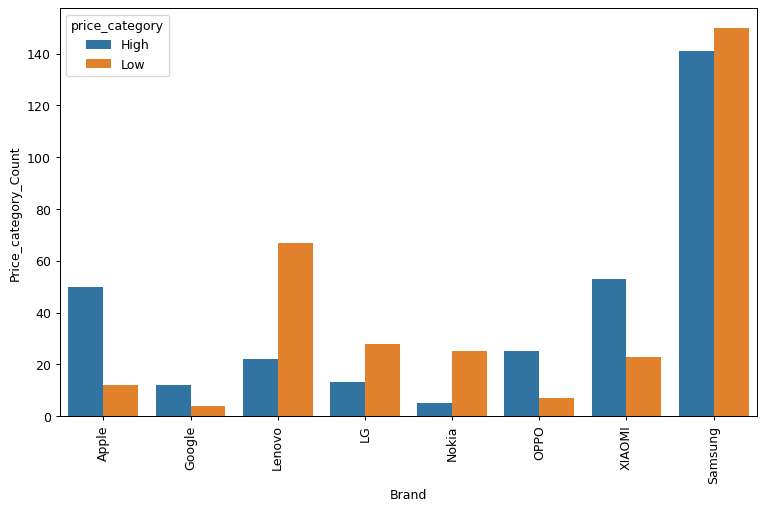

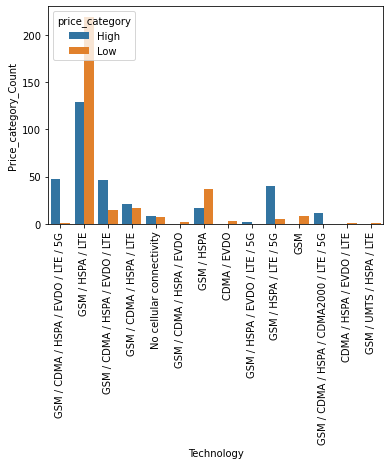

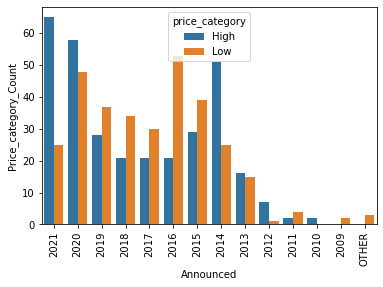

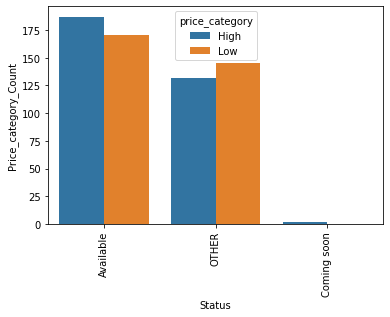

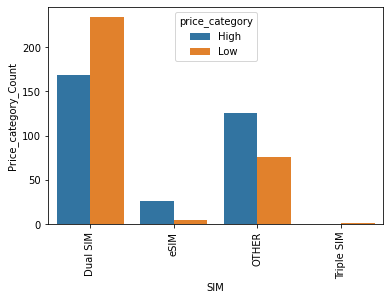

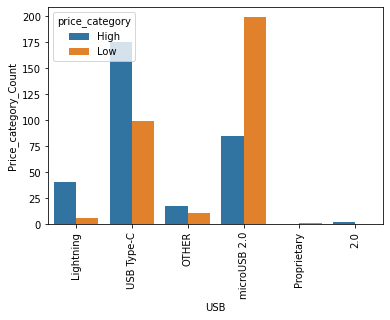

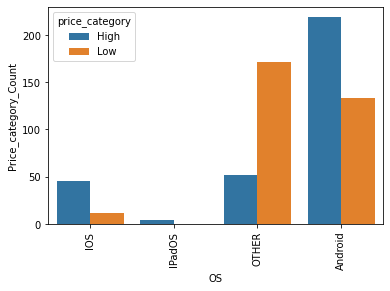

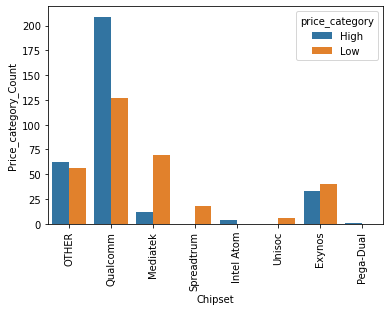

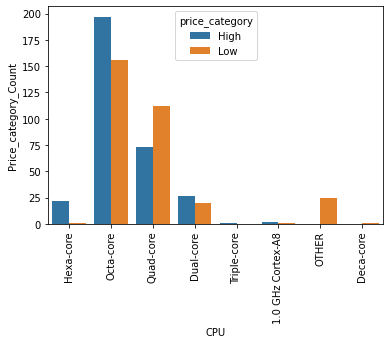

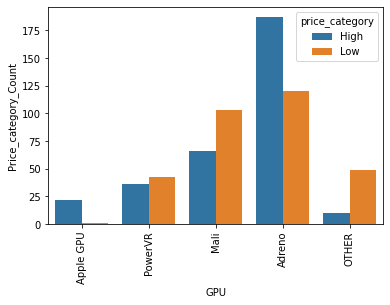

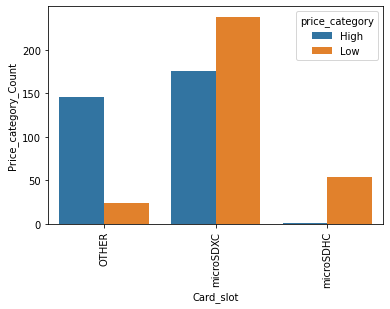

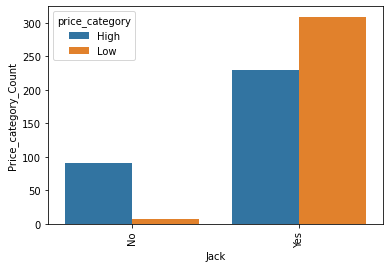

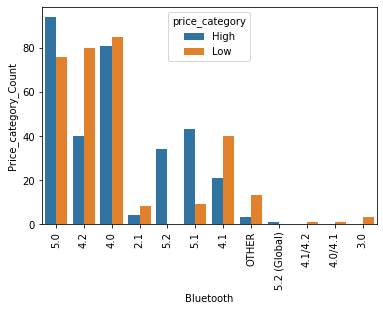

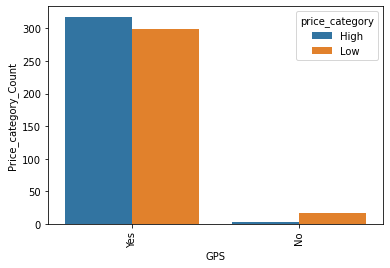

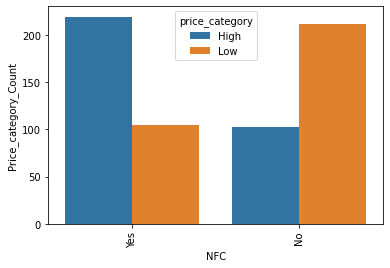

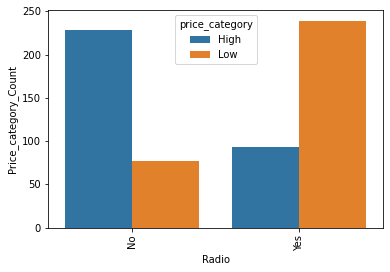

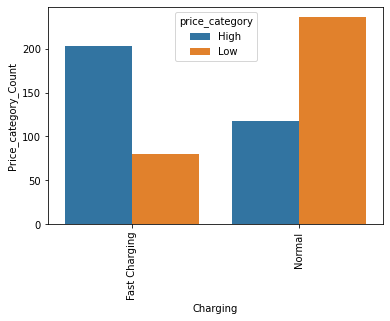

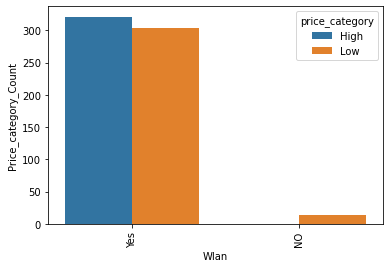

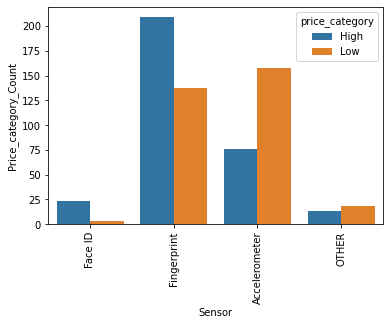

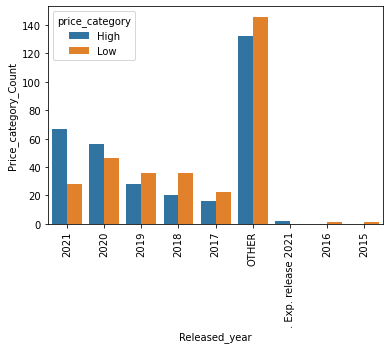

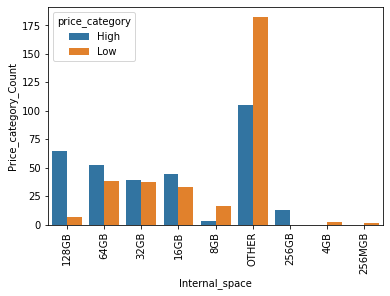

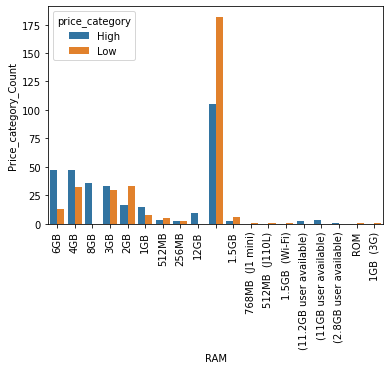

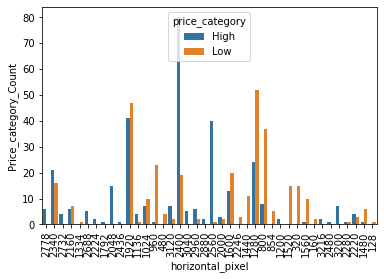

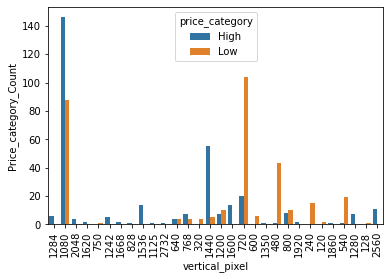

In [22]:
# Relation between cat_features and price_cat
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=90)
for feature in cat_features:
    data=d.copy()
    if feature not in ['Product','price_category']:
        data=d.copy()
        sns.countplot(x=feature,hue='price_category', data=data)
        plt.xlabel(feature)
        plt.ylabel("Price_category_Count")
        plt.xticks(rotation=90)
        plt.show()

In [23]:
cont_feature=[feature for feature in num_feature if len(d[feature].unique())>25] # List of continuous features

In [24]:
cont_feature

['Weight', 'Size']

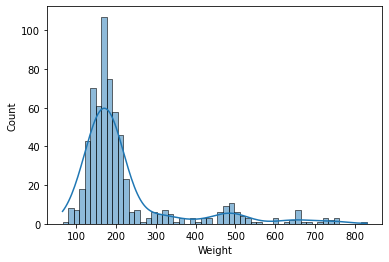

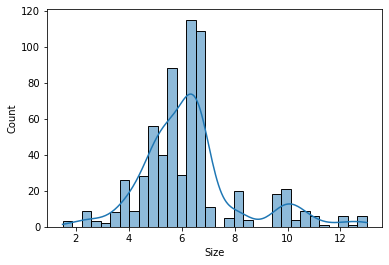

In [25]:
for feature in cont_feature: # Distribution of weight and size
    data=d.copy()
    sns.histplot(x=feature,data=data,kde=True)
    plt.show()

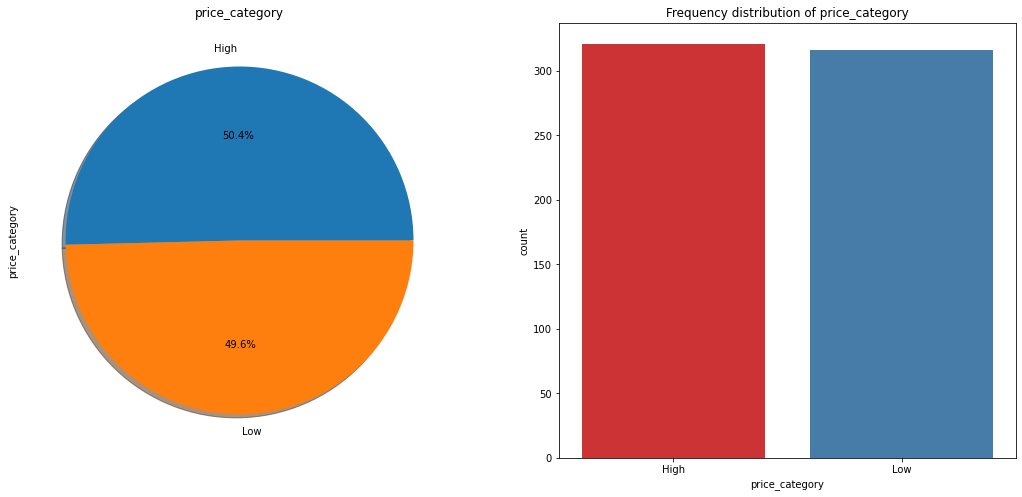

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # We can see that dataset is balanced 

ax[0] = d['price_category'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('price_category')


ax[1] = sns.countplot(x='price_category', data=d, palette="Set1")
ax[1].set_title("Frequency distribution of price_category")

plt.show()

In [27]:
temp_features

['Announced', 'Released_year']

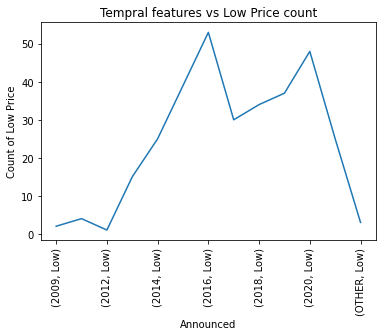

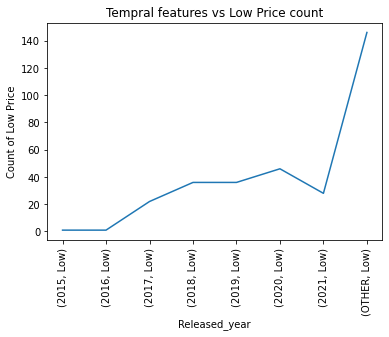

In [28]:
for feature in temp_features:  # Temporal Features VS Price category count
    data=d.copy()
    low_price=data[data['price_category']=='Low']
    low_price.groupby(feature)['price_category'].value_counts().plot()
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("Count of Low Price")
    plt.title("Tempral features vs Low Price count")
    plt.show()
    
        

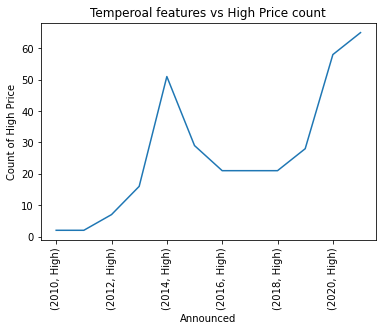

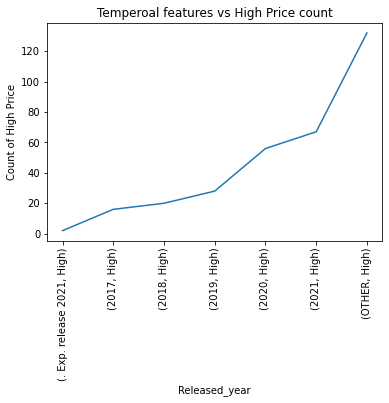

In [29]:
for feature in temp_features:
    data=d.copy()
    low_price=data[data['price_category']=='High']
    low_price.groupby(feature)['price_category'].value_counts().plot()
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("Count of High Price")
    plt.title("Temperoal features vs High Price count")
    plt.show()

In [30]:
d['Wlan'].unique()

array(['Yes', 'NO'], dtype=object)

# Feature Engineering

In [31]:
# Create Dummies
data=d.copy()
data.drop(['Product'],axis=1,inplace=True)
cat_features_final=[feature for feature in data.columns if data[feature].dtype=="O" and feature!='price_category']
#print(cat_features_final)
data_2 = pd.get_dummies(data, columns =cat_features_final , drop_first=True)
data_2.head()


,Weight,Size,price_category,Brand_Google,Brand_LG,Brand_Lenovo,Brand_Nokia,Brand_OPPO,Brand_Samsung,Brand_XIAOMI,...,vertical_pixel_320,vertical_pixel_480,vertical_pixel_540,vertical_pixel_600,vertical_pixel_640,vertical_pixel_720,vertical_pixel_750,vertical_pixel_768,vertical_pixel_800,vertical_pixel_828
0,240.0,6.7,High,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,240.0,6.7,High,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,240.0,6.7,High,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,141.0,5.4,High,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,682.0,12.9,High,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y = data_2['price_category'] # Target Column
x = data_2.drop(['price_category'], axis = 1)

In [33]:
from sklearn.model_selection import train_test_split # Train test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler # Feature Scaling
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# Machine Learning Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42) # grid search cv to get best parameters
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [37]:
random_model = RandomForestClassifier(n_estimators=200,random_state=0, criterion='gini',max_depth=8,max_features='auto')
random_model.fit(X_train, y_train)



y_pred = random_model.predict(X_test)




print('Model accuracy with Best Parameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100)) 

Model accuracy with Best Parameters : 85.1562
